# 7.7 实现误差反向传播算法

### 1.任务描述

假设有一个两层神经网络，网络的输入层、隐含层和输出层都只有一个神经元。隐含层和输出层的激活函数都是Sigmoid函数，各层的表达式如下。

1. 隐含层

- 输入：隐含层神经元接收输入值x。- 
线性计算：通过本层的参数$w_h$（$b_h$和）进行线性计算，得$z_h=w_hx+b_h$：- 

激活：将作为Sigmoid激活函数的输入，计$y_h=\frac{1}{1+e^{-z_h}}$输- ：

输出：隐含层将激活$y_h$函数的输出作为本层的输出。


2. 输出层

输入：将隐含层的输出$y_h$作为输出层的输入。
线性计算：通过本层的参数$w_o$（$b_o$和）进行线性计算，得$z_o=w_oy_h+b_o$到：

激$z_o$活：将作为Sigmoid激活函数的输入，计$y_o=\frac{1}{1+e-z_o}$算输出：

输出：输出层将激活$y_o$函数的输出作为本层的输出。


假设样本特征x为1，样本标签y为0.8。则隐含层参数初始值：$w_h=0.2,b_h=0.1$；输出层参数初始值：$w_o=0.3,b_o=0.2$，学习率$\eta=0.5$。

求：网络训练，将样本数据x输入网络，通过误差反向传播算法寻找合适的模型参$w_h,b_h,w_o,b_o$，使得网络的输出与样本数据的标签y一致。

### 2.知识准备

见教程。

### 3.任务分析

网络学习的步骤如下：

1. 设置模型参数初始值

隐含层参数初始值：$w_h=0.2,b_h=0.1$，输出层参数初始值：$w_o=0.3,b_o=0.2$，学习率$\eta=0.5$。

2. 正向计算预测值

使用模型参数初始值和样本x逐层计算，得到神经网络的预测值，隐含层的输出为：

$$y_h=\frac{1}{1+e^{-(0.2*1+0.1)}}\approx0.57$$

输出层的输出为：

$$y_o=\frac{1}{1+e^{-(0.3*0.57+0.2)}}\approx0.59$$

$y_o$就是网络的预测值，其与样本标签（0.8）差距比较大，需要使用误差调整网络参数，也就是训练网络。

3. 计算误差

使用平方损失函数计算出预测值和标签之间的误差：

$$Loss=\frac{1}{2}(y-y_o)^2=\frac{1}{2}(0.8-0.59)^2=0.02205$$

4. 误差反向传播

对损失函数的梯度信息进行反向传播，同时更新所有层的模型参数。

- 更新输出层参数

梯度下降法参数更新公式为：

$$w_o^{(k+1)}=w_o^{(k)}-\eta\frac{\partial Loss}{\partial w_o}$$
$$b_o^{(k+1)}=b_o^{(k)}-\eta\frac{\partial Loss}{\partial b_o}$$


(1)求Loss对$w_o$的偏导数

在损失函数中，$Loss,y_o,z_o$三个函数之间是嵌套关系，关系式如下：

$$Loss=\frac{1}{2}(y-y_o)^2$$
$$y_o=\frac{1}{1+e^{(-z_o)}}$$
$$z_o=w_oy_h+b_o$$



要得到损失函数$Loss$对$w_o$的偏导数，可以使用链式求导法则：

$$\frac{\partial Loss}{\partial w_o}=\frac{\partial Loss}{\partial y_o}*\frac{\partial y_o}{\partial z_o}*\frac{\partial z_o}{\partial w_o}$$


分别计算偏导数：

$$\frac{\partial Loss}{\partial y_o}=2*\frac{1}{2}*(y-y_o)*(-1)=-(0.8-0.59)=-0.21$$
$$\frac{\partial y_o}{\partial z_o}=\frac{e^{-z_o}}{(1+e{-z_o)^2}}=y_o*(1-y_o)=0.59*(1-0.59)=0.2419$$
$$\frac{\partial z_o}{\partial w_o}=y_h+0=0.57$$

将这三个偏导数代入Loss对的偏导数，得到：

$$\frac{\partial Loss}{\partial w_o}=\frac{\partial Loss}{\partial y_o}*\frac{\partial y_o}{\partial z_o}*\frac{\partial z_o}{\partial w_o}=-0.21*0.2419*0.57=-0.0295543$$

(2)求Loss对$b_o$的偏导数

$$\frac{\partial Loss}{\partial b_o}=\frac{\partial Loss}{\partial y_o}*\frac{\partial y_o}{\partial z_o}*\frac{\partial z_o}{\partial b_o}=-0.21*0.2419*1=-0.050799$$

(3)使用迭代公式更新$w_o$和$b_o$

$$w_o^{(1)}=w_o^{(0)}-\eta\frac{\partial Loss}{\partial w_o}=0.3-0.5*(-0.02895543)=0.314477715$$
$$b_o^{(1)}=b_o^{(0)}-\eta\frac{\partial Loss}{\partial b_o}=0.2-0.5*(-0.050799)=0.2253995$$

现在，输出层的模型参数已更新完成。

- 更新隐含层的参数

使用梯度下降法计算损失函数对隐含层的参数$w_h$和$b_h$的偏导数。

(1)求损失函数对$w_h$的偏导数。

损失函数中$Loss$与$y_o,z_o,y_H,z_h$之间是嵌套关系，关系式如下：

$$Loss=\frac{1}{2}(y-y_o)^2$$
$$y_o=\frac{1}{1+e^{(-z_o)}}$$
$$z_o=w_oy_h+b_o$$
$$y_h=\frac{1}{1+e{-z_h}}$$
$$z_h=w_hx+b_h$$

要得到损失函数Loss对$w_h$的偏导数，可以使用链式求导法则：

$$\frac{\partial Loss}{\partial w_h}=\frac{\partial Loss}{\partial y_o}*\frac{\partial y_o}{\partial z_o}*\frac{\partial z_o}{\partial y_h}*\frac{\partial y_h}{\partial z_h}*\frac{\partial z_h}{\partial w_h}$$

分别计算偏导数：

$$\frac{\partial Loss}{\partial y_o}=2*\frac{1}{2}*(y-y_o)*(-1)=-(0.8-0.59)=-0.21$$
$$\frac{\partial y_o}{\partial z_o}=\frac{e^{-z_o}}{(1+e^{-z_o})^2}=y_o(1-y_o)=0.59*(1-0.59)=0.2419$$
$$\frac{\partial z_o}{\partial y_h}=w_o=0.3$$
$$\frac{\partial y_h}{\partial z_h}=y_h(1-y_h)=0.57*(1-0.57)=0.2451$$
$$\frac{\partial z_h}{\partial w_h}=x=1$$


将计算结果代入Loss对$w_h$的偏导数，得到：

$$\frac{\partial Loss}{\partial w_h}=\frac{\partial Loss}{\partial y_o}*\frac{\partial y_o}{\partial z_o}*\frac{\partial z_o}{\partial y_h}*\frac{\partial y_h}{\partial z_h}*\frac{\partial z_h}{\partial w_h}=-0.21*0.2419*0.3*0.2451*1=-0.00373525$$

(2)求损失函数对$b_h$的偏导数。

同样采用链式求导法则求$Loss$对$b_h$的偏导数：


$$\frac{\partial Loss}{\partial b_h}=\frac{\partial Loss}{\partial y_o}*\frac{\partial y_o}{\partial z_o}*\frac{\partial z_o}{\partial y_h}*\frac{\partial y_h}{\partial z_h}*\frac{\partial z_h}{\partial b_h}=-0.21*0.2419*0.3*0.2451*1=-0.00373525$$

(3)更新$w_h$和$b_h$

使用迭代公式更新$w_h$和$b_h$，公式如下：

$$w_h^{(1)}=w_h^{(0)}-\eta\frac{\partial Loss}{\partial w_h}=0.2-0.5(-0.00373525)=0.201867625$$
$$b_h^{(1)}=b_h^{(0)}-\eta\frac{\partial Loss}{\partial b_h}=0.1-0.5(-0.00373525)=0.101867625$$

至此，对网络中的所有模型参数都更新了，完成了一轮训练。

5. 迭代

使用新的参数逐层正向计算，得到新的预测值，然后与标签值进行比较，计算误差，再逐层反向传播损失函数的梯度信息，更新模型参数，完成下一轮训练。如此循环，直到误差收敛到一个极小的值。

### 4.任务实施


执行代码

0 wh: 0.2 ,bh: 0.1 ,wo: 0.3 ,bo: 0.2 ,yo: 0.59202254 ,loss: 0.021627314
10 wh: 0.21779878 ,bh: 0.11779876 ,wo: 0.41937417 ,bo: 0.40649143 ,yo: 0.65724415 ,loss: 0.010189619
20 wh: 0.23266931 ,bh: 0.1326693 ,wo: 0.4984085 ,bo: 0.54130167 ,yo: 0.6975226 ,loss: 0.005250812
30 wh: 0.24434496 ,bh: 0.14434496 ,wo: 0.55323696 ,bo: 0.6337892 ,yo: 0.7238221 ,loss: 0.002901536
40 wh: 0.25343347 ,bh: 0.15343344 ,wo: 0.5928223 ,bo: 0.69999564 ,yo: 0.741904 ,loss: 0.0016875721
50 wh: 0.26054475 ,bh: 0.16054471 ,wo: 0.6222935 ,bo: 0.7489627 ,yo: 0.75485367 ,loss: 0.0010190962


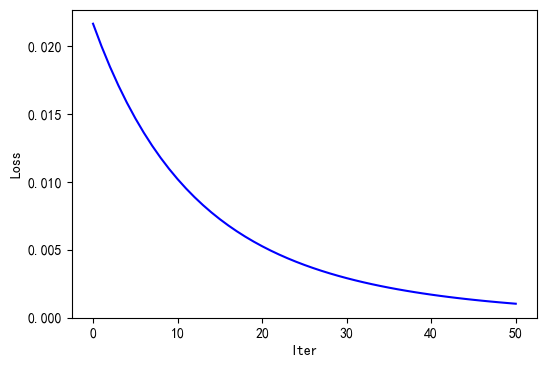

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

# 1，参数初始化
# 1.1，隐含层输入
x=tf.constant(1.,dtype=tf.float32)
# 1.2，标签
y=tf.constant(0.8,dtype=tf.float32)
# 1.3，学习率
lr=tf.constant(0.5,dtype=tf.float32)

# 1.4，隐含层参数
wh=tf.Variable(0.2,dtype=tf.float32)
bh=tf.Variable(0.1,dtype=tf.float32)
# 1.5，输出层参数
wo=tf.Variable(0.3,dtype=tf.float32)
bo=tf.Variable(0.2,dtype=tf.float32)

iter=50
losses=[]
# 2，训练
for i in range(0,iter+1):
    with tf.GradientTape(persistent=True) as tape:
        # 2.1，前向传播计算预测值
        # 隐含层线性输出公式
        zh=wh*x+bh        
        # 隐含层激活输出公式
        yh=tf.sigmoid(zh)        
        # 输出层线性输出公式
        zo=wo*yh+bo
        # 输出层激活输出公式
        yo=tf.sigmoid(zo)        
        # 2.2，计算损失公式
        loss=0.5*(tf.square(y-yo))
        
    # 将损失添加到列表
    losses.append(loss)
    # 打印本轮参数和损失
    if i%10==0:
        print(i,'wh:',wh.numpy(),',bh:',bh.numpy(),',wo:',wo.numpy(),',bo:',bo.
numpy(),',yo:',yo.numpy(),',loss:',loss.numpy())

    # 2.3，求Loss对输出层参数的偏导数
    dLoss_dwo,dLoss_dbo=tape.gradient(loss,[wo,bo])
    # 2.4，更新输出层参数
    wo.assign_sub(lr*dLoss_dwo)
    bo.assign_sub(lr*dLoss_dbo)
    
    # 2.5，求Loss对隐含层参数的偏导数
    dLoss_dwh,dLoss_dbh=tape.gradient(loss,[wh,bh])
    # 2.6，更新隐含层参数
    wh.assign_sub(lr*dLoss_dwh)
    bh.assign_sub(lr*dLoss_dbh)    
    
# 3，可视化损失
plt.figure(figsize=(6,4))
plt.plot(losses,color="b")
plt.xlabel("Iter")
plt.ylabel("Loss")
plt.show()